In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
ensaio1 = pd.read_csv('AluminioAH1.csv', encoding = "ISO-8859-1")
ensaio2 = pd.read_csv('AluminioAH2.csv', encoding = "ISO-8859-1")

In [5]:
# Position (mm)	Force (N)	Strain (%)	Time (min)	Tensão	Deformação absoluta
#área da seção transversal dos corpos de prova de alumínio (em mm^2):
area = 58.088
#inserindo a coluna com o valor da tensão em MPa (pois a área está em mm^2)
ensaio1.insert(4,'Tensão',ensaio1["Force (N)"]/area) #tensão em MPa
ensaio2.insert(4,'Tensão',ensaio1["Force (N)"]/area) #tensão em MPa
#inserindo a coluna com o valor da deformação absoluta (sem ser percentual)
ensaio1.insert(5, 'Deformação absoluta', ensaio1['Strain (%)']/100)
ensaio2.insert(5, 'Deformação absoluta', ensaio1['Strain (%)']/100)

In [43]:
regiao_linear_y = [ensaio1['Tensão'][i] for i in range(100,500)]
regiao_linear_x = [ensaio1['Strain (%)'][i] for i in range(100,500)]

slope1, intercept = np.polyfit(regiao_linear_x, regiao_linear_y, 1)
print(slope1)

regiao_linear_y = [ensaio2['Tensão'][i] for i in range(100,500)]
regiao_linear_x = [ensaio2['Strain (%)'][i] for i in range(100,500)]

slope2, intercept = np.polyfit(regiao_linear_x, regiao_linear_y, 1)
print(slope2)

723.91960787
730.920633077


In [23]:
ensaio1[ensaio1['Strain (%)'] == 0.2].index.tolist()
#encontrando em que linha está o valor de deformação de 0,2%

[440]

In [37]:
ensaio1[500:501]

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Deformação absoluta
500,2.27,10200,0.238,2.26,175.595648,0.00238


In [36]:
ensaio1[440:441]
#conferindo

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Deformação absoluta
440,2.0,8710,0.2,1.99,149.944911,0.002


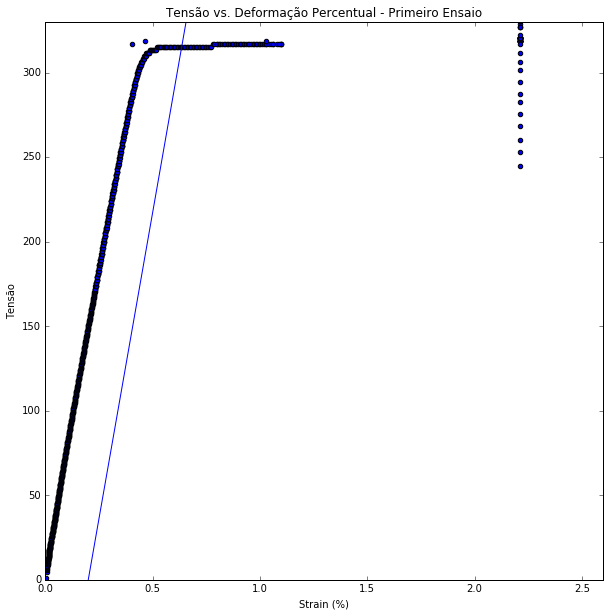

In [44]:
ensaio1.plot(kind='scatter', x='Strain (%)', y='Tensão', figsize=(10,10))
plt.axis([0,2.6,0,330])
plt.title('Tensão vs. Deformação Percentual - Primeiro Ensaio')

x_min, x_max = 0.2,0.8
y_min, y_max = 0, slope1*(x_max-x_min)
plt.plot([x_min, x_max], [y_min, y_max])

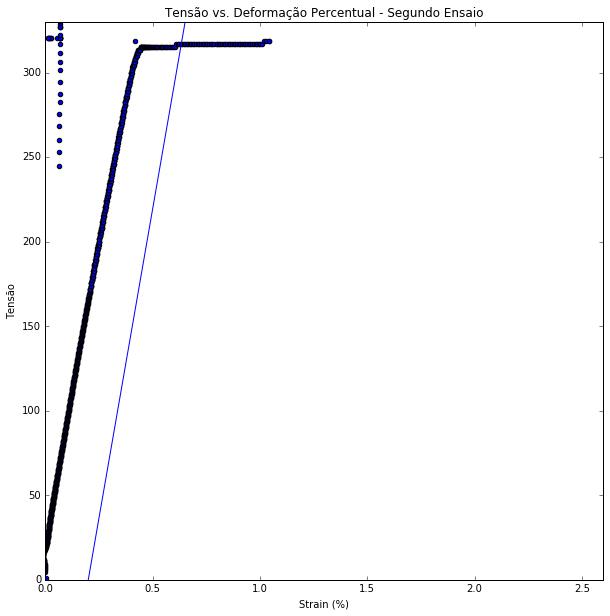

In [45]:
ensaio2.plot(kind='scatter', x='Strain (%)', y='Tensão', figsize=(10,10))
plt.axis([0,2.6,0,330])
plt.title('Tensão vs. Deformação Percentual - Segundo Ensaio')

x_min, x_max = 0.2,0.8
y_min, y_max = 0, slope2*(x_max-x_min)
plt.plot([x_min, x_max], [y_min, y_max])